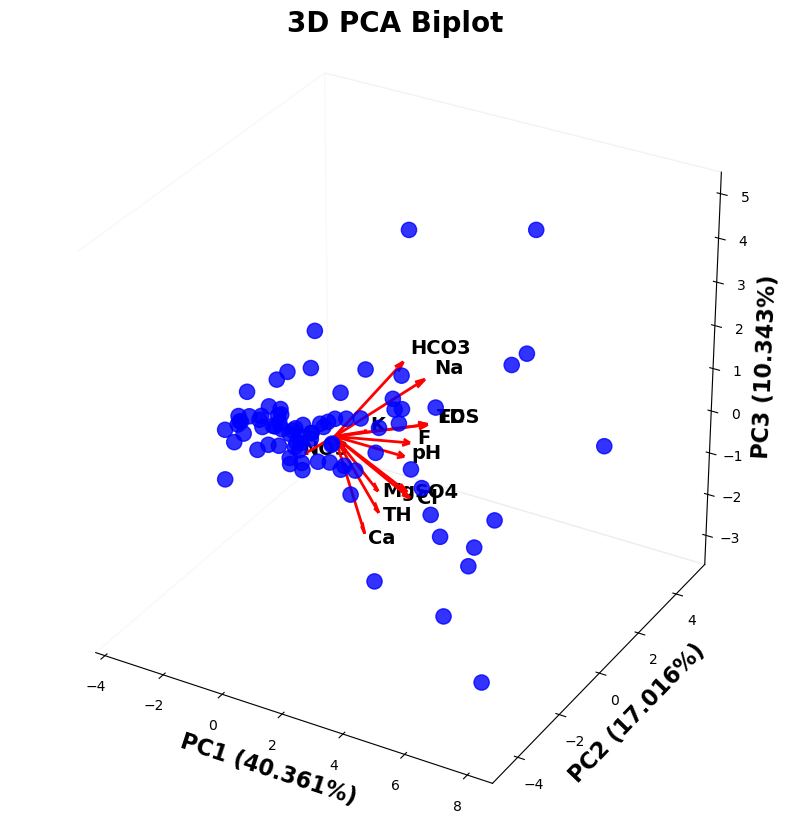

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_excel("waterquality.xlsx")
features = ['pH','EC','TDS','TH','Na','K','Ca','Mg','SO4','NO3','Cl','F','HCO3']
X = df[features].values

X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=3)
PC_scores = pca.fit_transform(X_scaled)


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(PC_scores[:,0], PC_scores[:,1], PC_scores[:,2], 
           color='blue', s=120, alpha=0.8, label='Samples')  


scale = 3  
for i, feature in enumerate(features):
    ax.quiver(0, 0, 0, loadings[i,0]*scale, loadings[i,1]*scale, loadings[i,2]*scale, 
              color='red', arrow_length_ratio=0.1, linewidth=2)
    ax.text(loadings[i,0]*scale*1.1, loadings[i,1]*scale*1.1, loadings[i,2]*scale*1.1, 
            feature, color='black', fontsize=14, fontweight='bold')  # bold labels


ax.set_xlabel('PC1 (40.361%)', fontsize=16, fontweight='bold')
ax.set_ylabel('PC2 (17.016%)', fontsize=16, fontweight='bold')
ax.set_zlabel('PC3 (10.343%)', fontsize=16, fontweight='bold')
ax.set_title('3D PCA Biplot', fontsize=20, fontweight='bold')


ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_box_aspect([1,1,1])  

plt.show()
